In [0]:
# Copyright 2018 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import trustscore
import trustscore_evaluation

In [0]:
from sklearn import datasets
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

In [0]:
datasets = [(X_iris, y_iris), (X_digits, y_digits)]
dataset_names = ["Iris", "Digits"]

# Example Usage

### Basic usage with default settings

In [0]:
from sklearn.linear_model import LogisticRegression
# Train logistic regression on digits.
model = LogisticRegression()
model.fit(X_digits[:1300], y_digits[:1300])
# Get outputs on testing set.
y_pred = model.predict(X_digits[1300:])
# Initialize trust score.
trust_model = trustscore.TrustScore()
trust_model.fit(X_digits[:1300], y_digits[:1300])
# Compute trusts score, given (unlabeled) testing examples and (hard) model predictions.
trust_score = trust_model.get_score(X_digits[1300:], y_pred)


### Trust score with initial filtering

In [0]:
# Default
trust_model = trustscore.TrustScore()

# Filter out alpha (0 < alpha < 1) proportion of the training points with
# lowest k-NN density when computing trust score.
trust_model = trustscore.TrustScore(k=10, alpha=0.1, filtering="density")

# Filter out alpha (0 < alpha < 1) proportion of the training points with
# highest label disagreement amongst its k-NN neighbors.
trust_model = trustscore.TrustScore(k=10, alpha=0.1, filtering="disagreement")

# Example comparison to model confidence

### Detect correctly classified examples.
In the following, we see how well the trust score is at detecting correctly classified examples. 
For each percentile level, we take the test examples whose trusts score is above that percentile
level and plot the percentage of those points that were correctly classified by the classifier, and
do the same with the classifier's own model confidence (i.e. softmax probabilities).
For example, at percentile level 80, we take the top 20% scoring test examples based on trust score
and plot the percentage of those points that were correctly classified. We also plot the top 20%
scoring test examples based on model confidence and plot the percentage of those that were
correct classified.
The vertical dotted line is the error of the classifier and we use logistic regression and the plots
are an average over 10 random train/test splits with error bands.

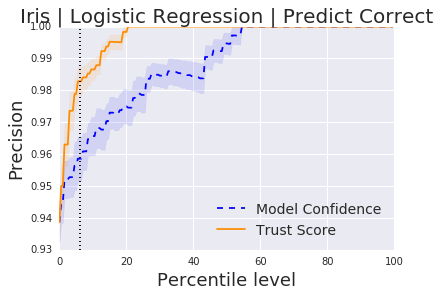

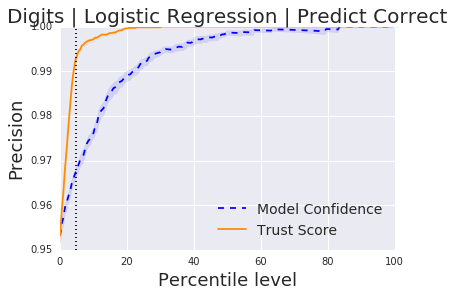

In [0]:
for dataset_idx,  dataset_name in enumerate(dataset_names):
  extra_plot_title = dataset_name + " | Logistic Regression | Predict Correct"
  percentile_levels = [0 + 0.5 * i for i in range(200)]
  signal_names = ["Trust Score"]
  signals = [trustscore.TrustScore()]
  trainer = trustscore_evaluation.run_logistic
  X, y = datasets[dataset_idx]
  trustscore_evaluation.run_precision_recall_experiment_general(X,
                                                                y,
                                                                n_repeats=10,
                                                                percentile_levels=percentile_levels,
                                                                trainer=trainer,
                                                                signal_names=signal_names,
                                                                signals=signals,
                                                                extra_plot_title=extra_plot_title,
                                                                skip_print=True,
                                                                predict_when_correct=True)

### Detect Incorrectly Classified Examples
We do the same but take the negative of each signal and use it to see how well we detect
incorrectly classified examples by the classifier.

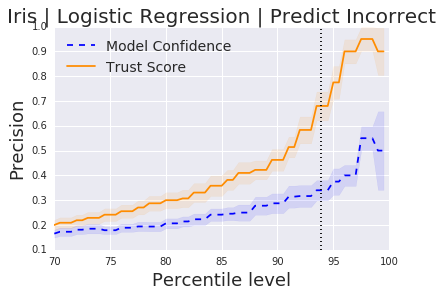

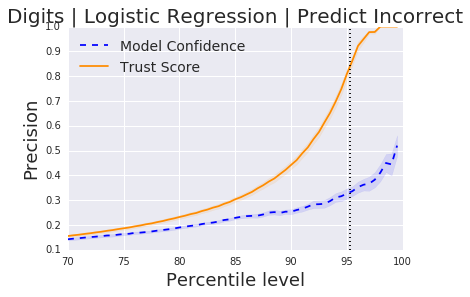

In [0]:
for dataset_idx,  dataset_name in enumerate(dataset_names):
  extra_plot_title = dataset_name + " | Logistic Regression | Predict Incorrect"
  percentile_levels = [70 + 0.5 * i for i in range(60)]
  signal_names = ["Trust Score"]
  signals = [trustscore.TrustScore()]
  trainer = trustscore_evaluation.run_logistic
  X, y = datasets[dataset_idx]
  trustscore_evaluation.run_precision_recall_experiment_general(X,
                                                                y,
                                                                n_repeats=10,
                                                                percentile_levels=percentile_levels,
                                                                trainer=trainer,
                                                                signal_names=signal_names,
                                                                signals=signals,
                                                                extra_plot_title=extra_plot_title,
                                                                skip_print=True)